In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
df = pd.read_csv("Airbnb NYC 2019.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1.0,0.0


In [4]:
# check dimension of dataset
df.shape

(4270, 16)

In [5]:
# check for details of dataset
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.270000e+03,4.270000e+03,4270.000000,4270.000000,4270.000000,4270.000000,4270.000000,3907.000000,4269.000000,4269.000000
mean,1.159443e+06,4.305356e+06,40.729187,-73.961215,174.845433,8.901639,60.092506,0.914981,2.341766,147.710939
std,8.211119e+05,3.861378e+06,0.050903,0.035758,269.826149,28.193442,78.840512,1.084907,5.725818,137.644321
min,2.539000e+03,2.571000e+03,40.508680,-74.239860,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,4.492625e+05,1.029553e+06,40.689483,-73.984740,81.250000,2.000000,6.000000,0.160000,1.000000,0.000000
50%,9.814520e+05,3.104737e+06,40.723525,-73.960970,125.000000,3.000000,26.000000,0.480000,1.000000,127.000000
75%,1.913244e+06,7.096780e+06,40.762480,-73.945400,195.000000,5.000000,84.000000,1.290000,2.000000,281.000000
max,2.821079e+06,1.731875e+07,40.908040,-73.733230,6500.000000,1000.000000,607.000000,10.000000,52.000000,365.000000


Text(0.5, 1.0, 'Neighbourhood group wise distribution of airbnbs')

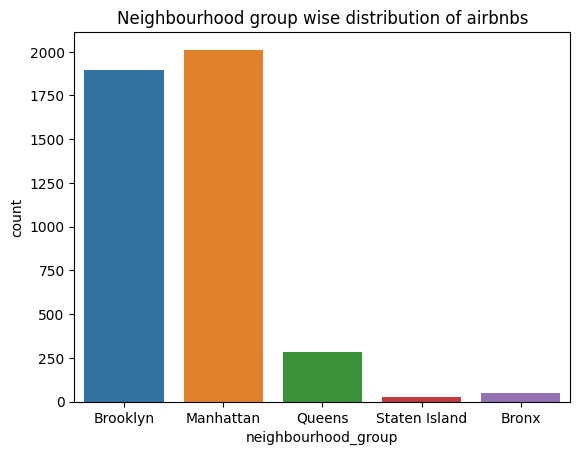

In [7]:
sns.countplot(x="neighbourhood_group",data=df)
plt.title('Neighbourhood group wise distribution of airbnbs')

In [8]:
# from above graph we can see Manhattan has the maximum number of airbnbs in the whole of NYC

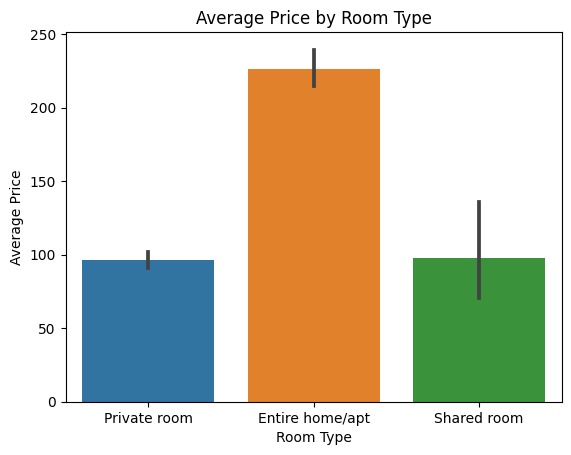

In [11]:
# Average Price by Neighbourhood Group
sns.barplot(data=df, x='room_type', y='price')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

In [24]:
# here we can see Entire room or apparment is most expensive compare to private room and shared room
# also maximum no. of people preferce Entire room

In [17]:
# calculating max booking with respect to neighbourhood
maxbook=df['neighbourhood'].value_counts().reset_index()[0:10]
maxbook.columns=['neighbor','count']
maxbook

,neighbor,count
0,Williamsburg,435
1,Bedford-Stuyvesant,292
2,Harlem,282
3,East Village,248
4,Upper West Side,223
5,Greenpoint,156
6,Crown Heights,151
7,Upper East Side,150
8,Bushwick,134
9,Hell's Kitchen,129


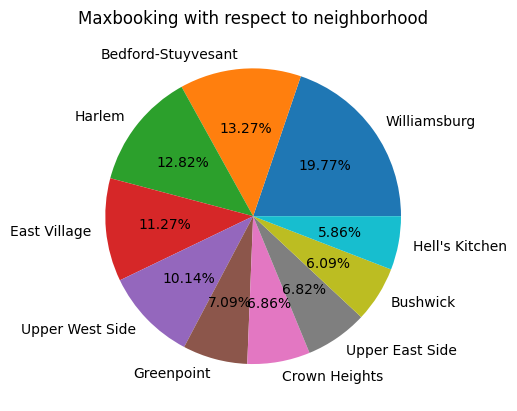

In [18]:
plt.pie(x='count',labels='neighbor',data=maxbook,autopct='%0.2f%%',startangle=0)
plt.title("Maxbooking with respect to neighborhood")
plt.show()

In [20]:
# Preference of the guests for Room Type
room_count=df['room_type'].value_counts().reset_index()
room_count.columns=['room type','count']
room_count

,room type,count
0,Entire home/apt,2577
1,Private room,1633
2,Shared room,60


Text(0, 0.5, 'Count')

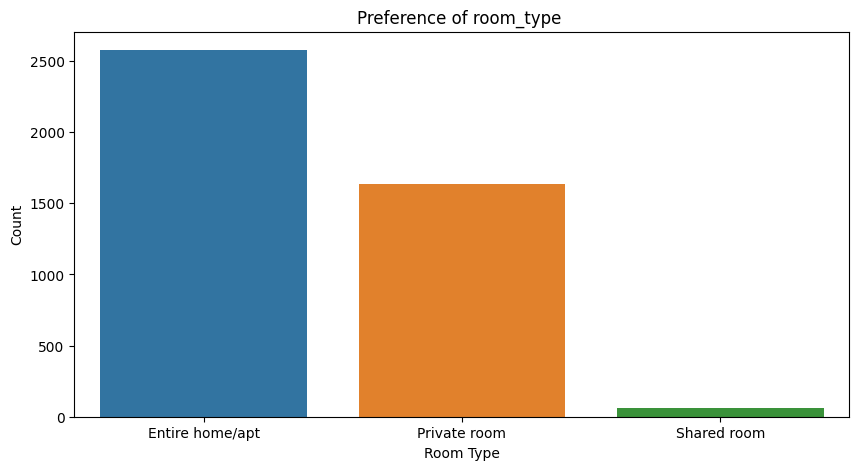

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(x='room type',y='count',data=room_count)
plt.title("Preference of room_type ")
plt.xlabel('Room Type')
plt.ylabel('Count')

In [23]:
# people preferce Entire home type room most

Text(0.5, 1.0, 'No. of reviews by Neighborhood Group')

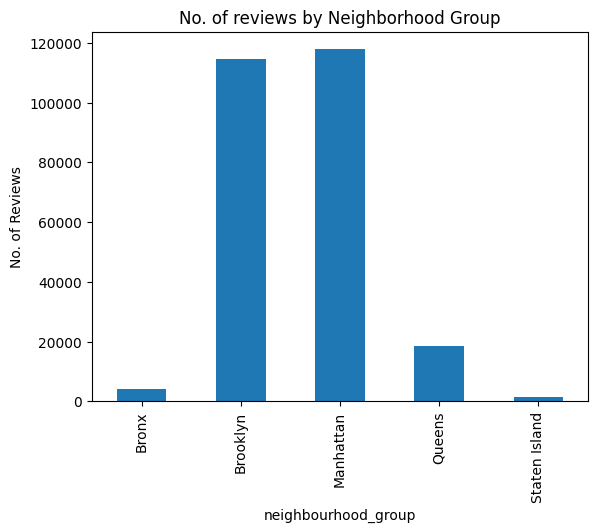

In [31]:
numbrev=df.groupby('neighbourhood_group')['number_of_reviews'].sum()
numbrev.plot(kind='bar')
plt.ylabel("No. of Reviews")
plt.title("No. of reviews by Neighborhood Group")